# Ocean Data Plot

In [2]:
# IMPORT MODULES [velocity_download environment]
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [3]:
# OPEN THE SAMPLED ALAMO DATA (F9250 & F9313)
ALAMO_F9250 = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/omg_alamo_F9250/ALAMO_F9250_240m.csv')
ALAMO_F9313 = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/omg_alamo_F9313/ALAMO_F9313_240m.csv')

In [4]:
ALAMO_F9250_TEMP = ALAMO_F9250['temperature']
ALAMO_F9250_DATE = pd.to_datetime(ALAMO_F9250['date'], dayfirst=True)

ALAMO_F9313_TEMP = ALAMO_F9313['temperature']
ALAMO_F9313_DATE = pd.to_datetime(ALAMO_F9313['date'], dayfirst=True)

In [5]:
# INPUT DESIRED X AXIS, Y AXIS, AND PLOT TITLES
xtitle = 'Date'
ytitle = 'Sea Water Temperature ($^\circ$C)'
title = 'Disko Bay Ocean Temperature at 240m (2018-2023)'

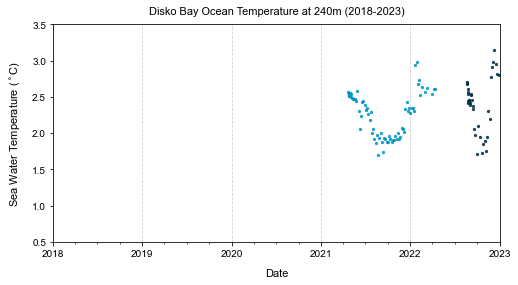

In [6]:
# CREATE A PLOT WITH GRID LINES
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(8, 4))
plt.title(title, pad=10, fontsize=11)
plt.grid(axis = 'x', alpha=0.6, linestyle='--')
plt.ylabel(ytitle, labelpad=10, fontsize=11)
plt.xlabel(xtitle, labelpad=10, fontsize=11)

# 
plt.scatter(ALAMO_F9250_DATE, ALAMO_F9250_TEMP, color='#0096c7', s=5, marker='o', alpha=0.85, label='ALAMO F9250', zorder=20)
plt.scatter(ALAMO_F9313_DATE, ALAMO_F9313_TEMP, color='#023047', s=5, marker='o', alpha=0.85, label='ALAMO F9313', zorder=20)

# FORMAT THE Y-AXIS TICK LIMITS  
min_y_value = 0.5
max_y_value = 3.5
interval_y = 0.5
plt.ylim(bottom=min_y_value, top=max_y_value)
plt.yticks(np.arange(min_y_value, max_y_value+0.1, interval_y))
minor_locator = ticker.MultipleLocator(base=1)
ax.yaxis.set_minor_locator(minor_locator)

# DEFINE THE FORMATTING FOR THE X-TICKS
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)